In [2]:
import numpy as np
import os
from scipy.optimize import curve_fit 
import matplotlib.pyplot as pl
import sympy as sy

## Directories

In [5]:
#dire="C:/Users/dilli/OneDrive/Downloads/Stony Brook University Courses & Research/Fall 2022/QIST/Entanglement Experiment/"

#"C:/Users/dilli.DESKTOP-P60JFM2/OneDrive/Downloads/Stony Brook University Courses & Research/Fall 2022/QIST/Entanglement Experiment/"
dire = "C:/Users/dilli.DESKTOP-P60JFM2/OneDrive/Downloads/Stony Brook University Courses & Research/Fall 2022/QIST/Entanglement Experiment/"

In [6]:
a0_dir = dire+"a_0_degrees/"
a0=os.listdir(a0_dir)
a45_dir = dire+"a_45_degrees/"
a45=os.listdir(a45_dir)
a90_dir = dire+"a_90_degrees/"
a90=os.listdir(a90_dir)
a135_dir = dire+"a_135_degrees/"
a135=os.listdir(a135_dir)
ab_dir = dire+"a equals b/"
ab = os.listdir(ab_dir)
noa_dir = dire+"no alpha data/"
noa = os.listdir(noa_dir)
CHSH_dir = dire+"CHSH Data/"
CHSH = os.listdir(CHSH_dir)

## Load Data In & Plot for varying $\beta ,\alpha$

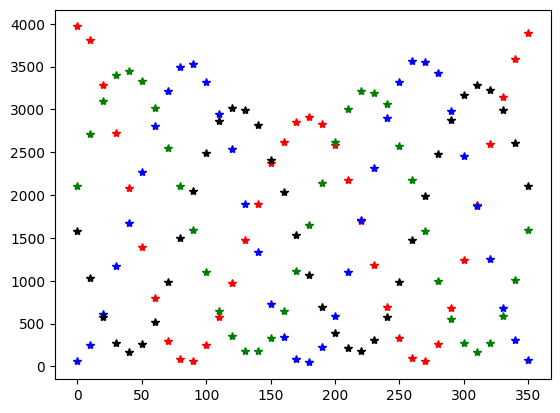

In [7]:
the=0
aves = np.zeros([36,4])
datas = np.zeros([60,36,4]) #all points of data from all alpha,beta combinations [data point, beta value, alpha value]
indvc = np.zeros([60,36,4,2])
std = np.zeros([36,4])
for i in a0:
    data = np.loadtxt(a0_dir+i,delimiter="\t",usecols=range(4))
    for i in range(60):
        datas[i,int(the/10),0]= data[i,3]
        indvc[i,int(the/10),0,0] = data[i,1]
        indvc[i,int(the/10),0,1] = data[i,2]
    aves[int(the/10),0] =np.average(data[:,3])
    std[int(the/10),0] = np.std(data[:,3])
    pl.plot(the,np.average(data[:,3]),"*", color="red")
    the+=10;

the=0;
for i in a45:
    data = np.loadtxt(a45_dir+i,delimiter="\t",usecols=range(4))
    for i in range(60):
        datas[i,int(the/10),1]= data[i,3]
        indvc[i,int(the/10),1,0] = data[i,1]
        indvc[i,int(the/10),1,1] = data[i,2]
    aves[int(the/10),1] =np.average(data[:,3])
    std[int(the/10),1] = np.std(data[:,3])
    pl.plot(the,np.average(data[:,3]),"*", color="green")
    the+=10;

the=0;
for i in a90:
    data = np.loadtxt(a90_dir+i,delimiter="\t",usecols=range(4))
    for i in range(60):
        datas[i,int(the/10),2]= data[i,3]
        indvc[i,int(the/10),2,0] = data[i,1]
        indvc[i,int(the/10),2,1] = data[i,2]
    aves[int(the/10),2] =np.average(data[:,3])
    std[int(the/10),2] = np.std(data[:,3])
    pl.plot(the,np.average(data[:,3]),"*", color="blue")
    the+=10;
the=0;
for i in a135:
    data = np.loadtxt(a135_dir+i,delimiter="\t",usecols=range(4))
    for i in range(60):
        datas[i,int(the/10),3]= data[i,3]
        indvc[i,int(the/10),3,0] = data[i,1]
        indvc[i,int(the/10),3,1] = data[i,2]
    aves[int(the/10),3] =np.average(data[:,3])
    std[int(the/10),3] = np.std(data[:,3])
    pl.plot(the,np.average(data[:,3]),"*", color="black")
    the+=10;
    


## Load Data & plot for $\alpha = \beta$ and no $\alpha $ polarizer

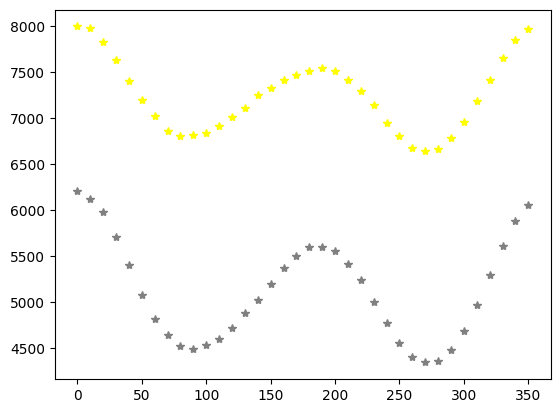

In [81]:
aves_ab = np.zeros([36])
aves_no_a = np.zeros([36])
std_ab=np.zeros([36])
std_no_a=np.zeros([36])
dom_the = np.linspace(0,360,36)
the=0;
for i in ab:
    data = np.loadtxt(ab_dir+i,delimiter="\t",usecols=range(4))
    aves_ab[int(the/10)] = np.average(data)
    std_ab[int(the/10)] = np.std(data[:,3])
    pl.plot(the,np.average(data),"*", color="grey")
    the+=10;

the=0;
for i in noa:
    data = np.loadtxt(noa_dir+i,delimiter="\t",usecols=range(4))
    aves_no_a[int(the/10)] = np.average(data)
    std_no_a[int(the/10)] = np.std(data[:,3])
    pl.plot(the,np.average(data),"*", color="yellow")
    the+=10;

In [69]:
dom_the

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350., 360.])

## Load Data for CHSH Inequality

[5856.26666667 4524.00416667 4544.27916667 5456.725      4645.60416667
 4427.80833333 4418.775      4432.69166667 5520.64166667 4704.88333333
 4260.79583333 4747.5125     4814.92916667 4123.38333333 4616.7
 4971.8875    ]


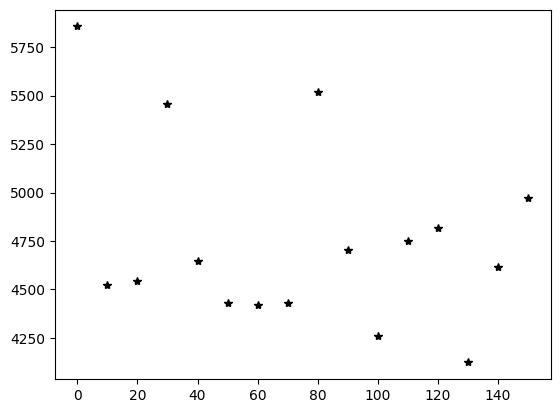

In [98]:
the=0;
aves_CHSH = np.zeros(16)
for i in CHSH:
    data = np.loadtxt(CHSH_dir+i,delimiter="\t",usecols=range(4))
    aves_CHSH[int(the/10)] =np.average(data)
    pl.plot(the,np.average(data),"*", color="black")
    the+=10;
    
print(aves_CHSH)

## Create Global Fitting function

In [19]:
dom = np.linspace(0,360,36)
dom_fit = np.linspace(0,360,360)
def global_fit(b,a,c1,c2,c3,c4,N,P):
    return N*(c1*np.sin(P*(a+b))**2+c2*np.sin(P*(a-b))**2+c3*np.cos(P*(a+b))**2+c4*np.cos(P*(a-b))**2) #|psi plus>+|psi minus> +|phi minus>+|phi minus>

def fun(b,a,c1,c2,c3,c4,N,P):
    return (2.71828**(b)**2)*N*(c1*np.sin(P*(a+b))**2+c2*np.sin(P*(a-b))**2+c3*np.cos(P*(a+b))**2+c4*np.cos(P*(a-b))**2) #|psi plus>+|psi minus> +|phi minus>+|phi minus>


$$

## Curve Fit for $\alpha$ = 0 $^\circ$

array([ 0.00000000e+00,  5.34123719e-03,  5.34134434e-03,  1.00000000e+00,
       -3.71113492e-04,  3.40919618e+03,  1.73781131e-02])

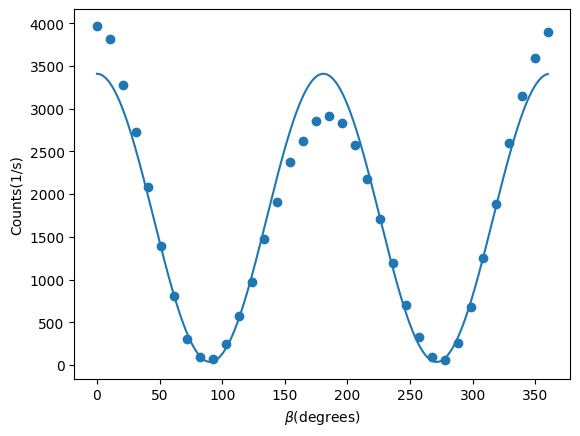

In [20]:
dom_1 = np.linspace(0,2*np.pi,360)*180/np.pi #                                           (b,a,c1,c2,c3,c4,N,P)
popt0, pcov0 = curve_fit(global_fit, dom, aves[:,0],bounds = ([-1e-16,-1,-1,-1,-1,-np.inf,-np.inf],[1e-16,1,1,1,1,np.inf,np.inf]),p0 =[0,0,0,1,0,1500,.018],maxfev = 20000000) #-1500,.0355,1500
pl.scatter(dom[0:36],aves[:,0])

pl.plot(dom_1,global_fit(dom_1,*popt0))

#pl.plot(dom_1,global_fit(dom_1,-3.25403417e+00,0,  0,  1.0e+00,
#       0,  4.00087725e+03,  1.75410356e-02))
pl.xlabel(r"$\beta$"+"(degrees)")
pl.ylabel("Counts(1/s)")
popt0

## Curve Fit for $\alpha$ = 45 $^\circ$

array([-4.29699552e+01,  3.40430604e-02,  5.58804249e-03,  9.94369499e-01,
        1.49966012e-02,  3.31300652e+03,  1.69103354e-02])

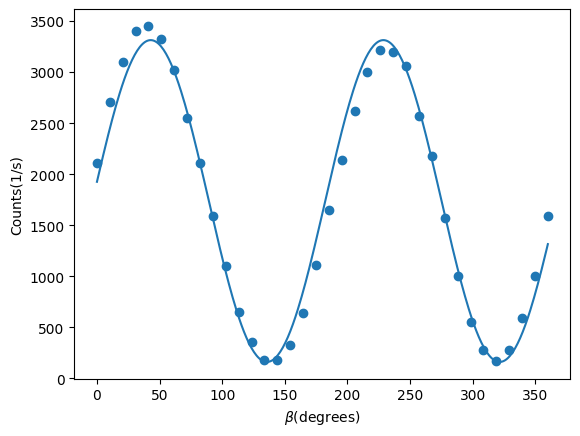

In [21]:
popt45, pcov45 = curve_fit(global_fit, dom,aves[:,1],bounds = ([-100,-1,-1,-1,-1,-np.inf,-np.inf],[100,1,1,1,1,np.inf,np.inf]),p0 =[-45,0,0,1,0,1500,.018],maxfev = 200000000) #-1500,.0355,1500
pl.scatter(dom,aves[:,1])

pl.plot(dom_1,global_fit(dom_1,*popt45))
pl.xlabel(r"$\beta$"+"(degrees)")
pl.ylabel("Counts(1/s)")
     
popt45

## Curve Fit for $\alpha$ = 90 $^\circ$

array([-8.92027123e+01,  1.33053605e-02,  2.88132599e-04,  9.99141415e-01,
        9.95553321e-04,  3.55640669e+03,  1.70220813e-02])

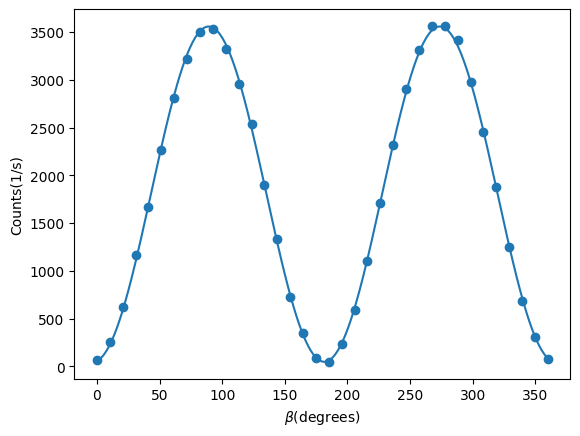

In [22]:
popt90, pcov90 = curve_fit(global_fit, dom, aves[:,2], bounds = ([-100,-1,-1,-1,-1,-np.inf,-np.inf],[100,1,1,1,1,np.inf,np.inf]),p0 =[-90,0,0,1,0,1500,.018],maxfev = 200000000) #-1500,.0355,1500
pl.scatter(dom,aves[:,2])
pl.plot(dom_1,global_fit(dom_1,*popt90))
pl.xlabel(r"$\beta$"+"(degrees)")
pl.ylabel("Counts(1/s)")

popt90

## Curve Fit for $\alpha$ = 135 $^\circ$

array([-1.31608866e+02,  5.11184776e-02,  9.52253562e-03,  9.97089094e-01,
        5.72751627e-03,  3.12122995e+03,  1.68843922e-02])

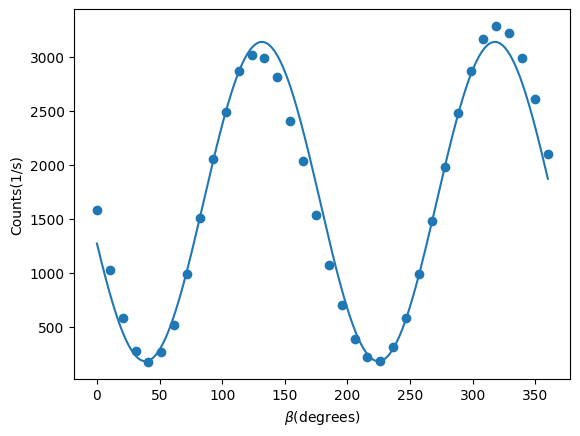

In [23]:
popt135, pcov135 = curve_fit(global_fit, dom, aves[:,3], bounds = ([-150,-1,-1,-1,-1,-np.inf,-np.inf],[-100,1,1,1,1,np.inf,np.inf]),p0 =[-135,0,0,1,0,1500,.018],maxfev = 200000000) #-1500,.0355,1500
pl.scatter(dom,aves[:,3])
pl.plot(dom_1,global_fit(dom_1,*popt135))
pl.xlabel(r"$\beta$"+"(degrees)")
pl.ylabel("Counts(1/s)")

popt135

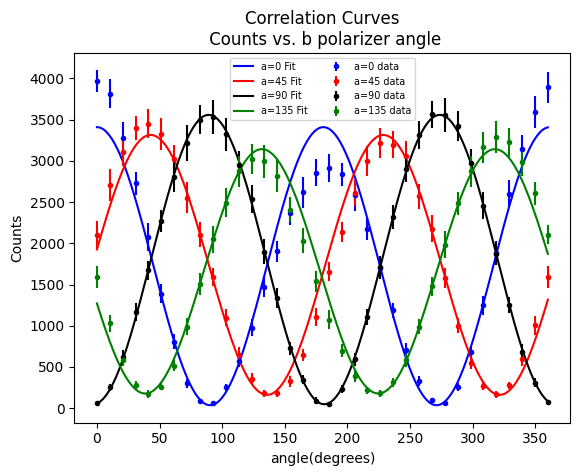

In [55]:
pl.plot(dom_1,global_fit(dom_1,*popt0),label = "a=0 Fit",color = "blue")
pl.errorbar(dom[0:36],aves[:,0],yerr = std[:,0], marker = ".",label = "a=0 data",linestyle = "",color = "blue")
pl.plot(dom_1,global_fit(dom_1,*popt45),label = "a=45 Fit",color = "red")
pl.errorbar(dom[0:36],aves[:,1],yerr = std[:,1],marker = ".",label = "a=45 data",linestyle = "",color = "red")
pl.plot(dom_1,global_fit(dom_1,*popt90),label = "a=90 Fit",color = "black")
pl.errorbar(dom[0:36],aves[:,2],yerr = std[:,2],marker = ".",label = "a=90 data",linestyle = "",color = "black")
pl.plot(dom_1,global_fit(dom_1,*popt135),label = "a=135 Fit",color = "green")
pl.errorbar(dom[0:36],aves[:,3],yerr = std[:,3],marker = ".",label = "a=135 data",linestyle = "",color = "green")
pl.title("Correlation Curves\n Counts vs. b polarizer angle")
pl.ylabel("Counts")
pl.xlabel("angle(degrees)")
pl.legend( fontsize = "x-small",ncol =2)


## Curve Fit for $\alpha$ = $\beta$

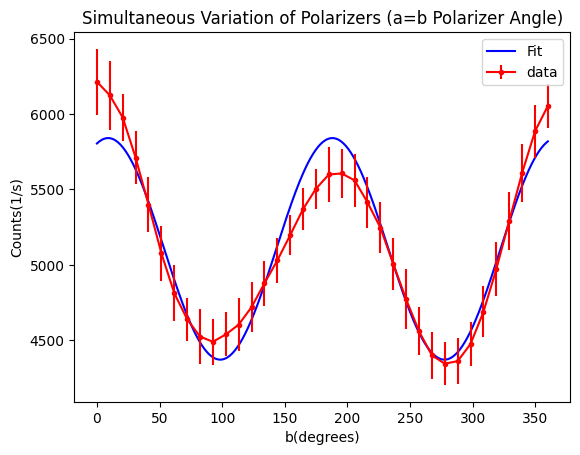

In [87]:
popt_ab, pcov_ab = curve_fit(global_fit, dom, aves_ab,p0 =[0,0,0,1,.5,3000,.0165],maxfev = 20000000) #-1500,.0355,1500
#pl.scatter(dom,aves_ab)

pl.plot(dom_1,global_fit(dom_1,*popt_ab),label = "Fit",color = "blue")
pl.xlabel("b"+"(degrees)")#(r"$\beta$"+"(degrees)")
pl.ylabel("Counts(1/s)")
pl.title("Simultaneous Variation of Polarizers (a=b Polarizer Angle)")
pl.errorbar(dom_the, aves_ab,std_ab,marker = ".",label="data",color = "red")
pl.legend()

## Curve Fit for no $\alpha$ polarizer

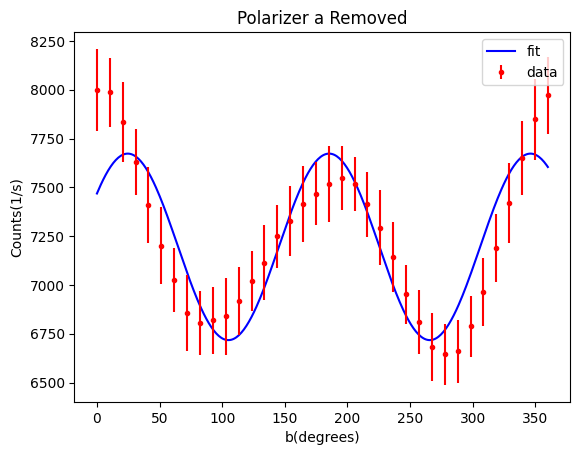

In [91]:
popt_no_a, pcov_no_a = curve_fit(global_fit, dom, aves_no_a,p0 =[0,0,0,1,1,3500,.02],maxfev = 20000000) #-1500,.0355,1500
#pl.scatter(dom,aves_no_a)

pl.plot(dom_1,global_fit(dom_1,*popt_no_a),label = "fit",color="blue")
pl.xlabel("b"+"(degrees)")
pl.ylabel("Counts(1/s)")
pl.title("Polarizer a Removed")

pl.errorbar(dom_the, aves_no_a,std_no_a,linestyle="", color = "red",marker = ".",label = "data")
pl.legend()

## Visibility Error Calculation

In [27]:
errmaxmin = np.zeros([36,4,2]) #36 is the # of data sets, 4 is the number of angles, and 2 is the max and min respectively
err_calc = np.zeros([36,4])
for i in range(4):
    for j in range(36):
        errmaxmin[j,i,0] = np.max(datas[:,j,i])
        errmaxmin[j,i,1] = np.min(datas[:,j,i])
        err_calc[j,i] = np.sqrt((np.sqrt(errmaxmin[j,i,0])*2*errmaxmin[j,i,1]/((errmaxmin[j,i,0]+errmaxmin[j,i,1])**2))**2+(np.sqrt(errmaxmin[j,i,1])*2*errmaxmin[j,i,0]/((errmaxmin[j,i,0]+errmaxmin[j,i,1])**2))**2)

<ErrorbarContainer object of 3 artists>

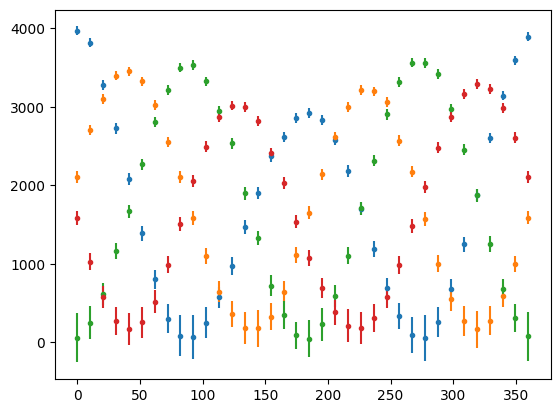

In [28]:
#pl.scatter(dom,aves[:,0])
#pl.plot(dom_1,global_fit(dom_1,*popt0))
#pl.scatter(dom,aves[:,1])
#pl.plot(dom_1,global_fit(dom_1,*popt45))
#pl.scatter(dom,aves[:,2])
#pl.plot(dom_1,global_fit(dom_1,*popt90))
#pl.scatter(dom,aves[:,3])
#pl.plot(dom_1,global_fit(dom_1,*popt135))

pl.errorbar(dom,aves[:,0],yerr=5000*err_calc[:,0],fmt='.')
pl.errorbar(dom,aves[:,1],yerr=5000*err_calc[:,1],fmt='.')
pl.errorbar(dom,aves[:,2],yerr=5000*err_calc[:,2],fmt='.')
pl.errorbar(dom,aves[:,3],yerr=5000*err_calc[:,3],fmt='.')                     

## Calculation of S

In [93]:
#Pg 28 in QuED manual
i=0;
my_dict = {}
x = "popt0"
my_dict[x] = popt0
x1 = "popt45"
my_dict[x1] = popt45
x2 = "popt90"
my_dict[x2] = popt90
x3 = "popt135"
my_dict[x3] = popt135


def C(a,b):#counts given angles alpha and beta, where alpha is 0,45,90,135
    p = "popt"+str(a)
    G=my_dict[p]
    return global_fit(b, *G)
def E(a,b): #expectation value of correlation
    return (C(a,b)-C(a,b+90)-C(a+90,b)+C(a+90,b+90))/(C(a,b)+C(a,b+90)+C(a+90,b)+C(a+90,b+90))
def S():#
    return E(0,22.5)+E(45,22.5)-E(0,67.5)+E(45,67.5);


In [97]:
anglesa = [0,0,0,0,90,90,90,90,45,45,45,45,135,135,135,135];
anglesb = [22.5,67.5,112.5,157.5,22.5,67.5,112.5,157.5,22.5,67.5,112.5,157.5,22.5,67.5,112.5,157.5]
j=0;
for i in anglesa:
    print(round(C(i,anglesb[j])))
    j+=1

2918
542
510
2886
672
3099
3034
602
2953
2799
626
568
393
828
2841
2612


In [21]:
S()

2.6383667775231885

## Standard Deviation of S

In [22]:
def del_E(a,b):
    return 2*((C(a,b)+C(a+90,b+90))*(C(a,b+90)+C(a+90,b))/(C(a,b)+C(a+90,b+90)+C(a,b+90)+C(a+90,b))**2)*np.sqrt(1/(C(a,b)+C(a+90,b+90))+1/(C(a,b+90)+C(a+90,b)))

In [23]:
a_val = [0,45]
b_val = [22.5,67.5]
sum_del_s =0;
i=0;
j=0;

for i in a_val:
    for j in b_val:
        sum_del_s = sum_del_s + (del_E(i,j))**2

del_S = np.sqrt(sum_del_s)

In [24]:
del_S

0.01798821850022297

In [25]:
print("Correlation: S=", S(), "+-", del_S)

Correlation: S= 2.6383667775231885 +- 0.01798821850022297


## Standard Deviation and Average of Correlation Curves